<a href="https://colab.research.google.com/github/meetAmarAtGithub/15_Reva_Speech_Analytics/blob/main/Session_1_Speech_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

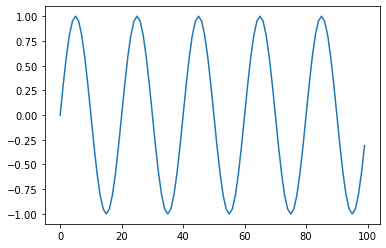

In [ ]:
#Create a sine wave
fs = 100 # sample rate
f = 5 # the frequency of the signal
cycles = 2 # Number of cycles

sx = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
sy = np.sin(cycles*np.pi*f * (sx/fs))

# Plot the sin curve
plt.plot(sx,sy)

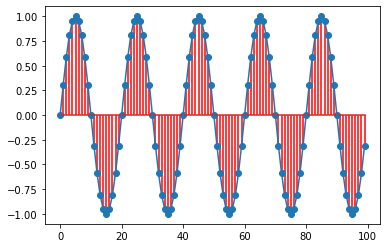

In [ ]:
# showing the exact location of the smaples
plt.stem(sx,sy, 'r', )
plt.plot(sx,sy)

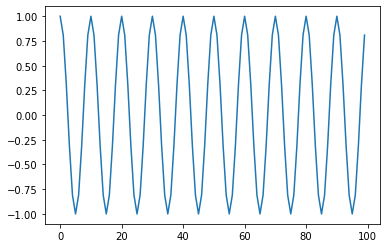

In [ ]:
#Create a cosine wave
fs = 100 # sample rate
f =5 # the frequency of the signal
cycles = 4 # Number of cycles

cx = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the cos wave at the for each sample
cy = np.cos(cycles*np.pi*f * (sx/fs))

# Plot the sin curve
plt.plot(cx,cy)

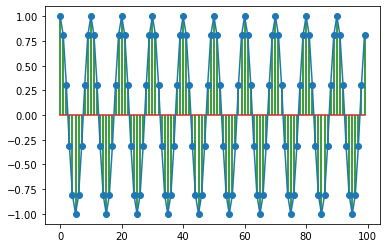

In [ ]:
# showing the exact location of the smaples
plt.stem(cx,cy, 'g', )
plt.plot(cx,cy)

In [ ]:
#Mix the waves
mx = sx
my = sy+cy

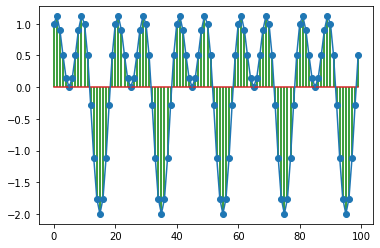

In [ ]:
# showing the exact location of the smaples
plt.stem(mx,my, 'g', )
plt.plot(mx,my)

In [ ]:
#Save the files
from scipy.io.wavfile import write

In [ ]:
#Save sine wave
scaled = (sy/np.max(np.abs(sy)) * 32767)
write('E:\\sine.wav', 44100, scaled)

In [ ]:
#Lets listen to sine wave
#Create and visualize the sine wave
wave_audio = np.sin(np.linspace(0, 3000, 20000))

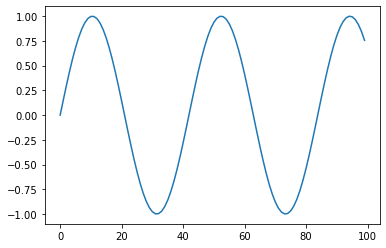

In [ ]:
#Plot first few cycle
plt.plot(wave_audio[:100])

In [ ]:
#listen to sine wave
from IPython.display import Audio
Audio(wave_audio, rate=10000)

In [ ]:
#WHat happens when you change the rate
#Experiment
Audio(wave_audio, rate=50000)

In [ ]:
#Now try with cosine waves

In [ ]:
#Now try with mixed waves

In [ ]:
#Can you generate a tune now?
#May be a capstone project

In [ ]:
#Now play a wav file
# use (pip install pydub) if required
from pydub import AudioSegment
from pydub.playback import play

song = AudioSegment.from_wav("D:\\RACE\\Speech Analytics\\Session 1\\Data\\session1_violin-origional.wav")
play(song)

E:\Warchest\WP-Old\python-3.9.5.amd64\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [ ]:
#Now visualize the wave file
import wave

110250 110250


<ipython-input-19-7f26f4a59fa2>:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


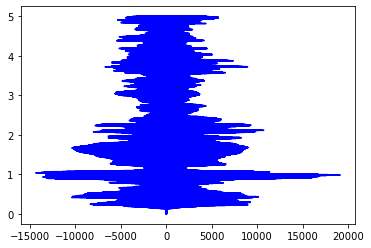

In [ ]:
f = wave.open("D:\\RACE\\Speech Analytics\\Session 1\\Data\\session1_violin-origional.wav", "rb")

# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

str_data = f.readframes(nframes)
f.close()

wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes/2) * (2 / framerate)

print(len(wave_data[0]), len(time))

plt.plot(wave_data[0], time, 'b')

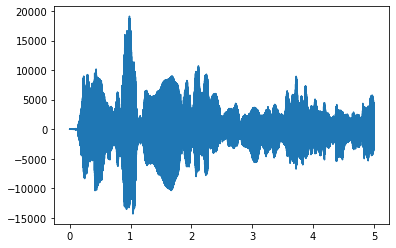

In [ ]:
#Re-orient the graph
plt.plot(time, wave_data[0])

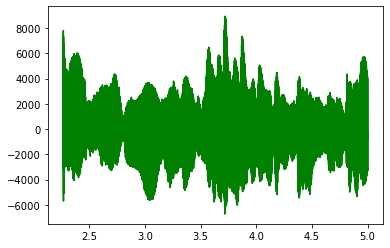

In [ ]:
#Clipping the frame
plt.plot(time[50000:], wave_data[0][50000:], 'g')

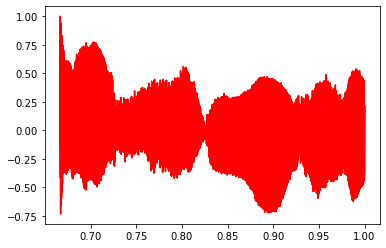

In [ ]:
#Noramlize the data
x = time[50000:75000]/np.max(time[50000:75000])
y = wave_data[0][50000:75000]/np.max(wave_data[0][50000:75000])
plt.plot(x,y,'r')

In [ ]:
#Audio data preprocessing
#if needed use (pip install librosa)


In [ ]:
import librosa

In [ ]:
# Specify the path to the audio file
audio_path = "D:\\RACE\\Speech Analytics\\Session 1\\Data\\session1_violin-origional.wav"

# Load the audio file
audio, sample_rate = librosa.load(audio_path)

# Find the tempo
tempo, _ = librosa.beat.beat_track(audio, sample_rate)

# Print the tempo
print(f"Tempo: {tempo} BPM")

Tempo: 92.28515625 BPM


<ipython-input-27-c6d190b6a390>:8: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, _ = librosa.beat.beat_track(audio, sample_rate)


In [ ]:
# Find the beats
tempo, beat_frames = librosa.beat.beat_track(audio, sample_rate)

# Convert beat frames to time
beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate)

print('Tempo:', tempo)
print('Beat average:', tempo/60)
print('Beat frames:', len(beat_frames))
print('Beat time:', beat_times)

Tempo: 92.28515625
Beat average: 1.5380859375
Beat frames: 7
Beat time: [0.18575964 0.85913832 1.50929705 2.15945578 2.85605442 3.52943311
 4.20281179]


<ipython-input-28-4fa2a2c81235>:2: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, beat_frames = librosa.beat.beat_track(audio, sample_rate)


In [ ]:
# Compute the audio metrics
onset_frames = librosa.onset.onset_detect(audio, sample_rate)
chroma_features = librosa.feature.chroma_stft(audio, sample_rate)
mfcc = librosa.feature.mfcc(audio, sample_rate)
spectral_centroids = librosa.feature.spectral_centroid(audio, sample_rate)
spectral_bandwidth = librosa.feature.spectral_bandwidth(audio, sample_rate)
spectral_contrast = librosa.feature.spectral_contrast(audio, sample_rate)
spectral_rolloff = librosa.feature.spectral_rolloff(audio, sample_rate)

# Print the audio metrics
print("Onsets:", onset_frames)
print("Chroma features shape:", chroma_features.shape)
print("MFCC shape:", mfcc.shape)
print("Spectral centroids shape:", spectral_centroids.shape)
print("Spectral bandwidth shape:", spectral_bandwidth.shape)
print("Spectral contrast shape:", spectral_contrast.shape)
print("Spectral rolloff shape:", spectral_rolloff.shape)

Onsets: [  7  17  19  26  30  37  52  79  90  93  97 107 122 132 137 151 155 160
 174 180 189 195 201 208]
Chroma features shape: (12, 216)
MFCC shape: (20, 216)
Spectral centroids shape: (1, 216)
Spectral bandwidth shape: (1, 216)
Spectral contrast shape: (7, 216)
Spectral rolloff shape: (1, 216)


<ipython-input-29-d6d40d2cf3e4>:2: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.onset.onset_detect(audio, sample_rate)
<ipython-input-29-d6d40d2cf3e4>:3: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_features = librosa.feature.chroma_stft(audio, sample_rate)
<ipython-input-29-d6d40d2cf3e4>:4: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sample_rate)
<ipython-input-29-d6d40d2cf3e4>:5: 

In [ ]:
# Compute the audio metrics
zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
rms_energy = librosa.feature.rms(audio)
spectral_flatness = librosa.feature.spectral_flatness(audio)
spectral_flux = librosa.onset.onset_strength(audio, sr=sample_rate)
spectral_spread = librosa.feature.spectral_bandwidth(audio, sr=sample_rate)
#spectral_skewness = librosa.feature.spectral_skewness(audio, sr=sample_rate)

# Print the audio metrics
print("Zero Crossing Rate:", zero_crossing_rate)
print("RMS Energy:", rms_energy)
print("Spectral Flatness:", spectral_flatness)
print("Spectral Flux:", spectral_flux)
print("Spectral Spread:", spectral_spread)
print("Spectral Skewness:", spectral_skewness)

Zero Crossing Rate: [[0.05810547 0.08691406 0.11767578 0.11816406 0.13037109 0.14501953
  0.16650391 0.21386719 0.20947266 0.20458984 0.20605469 0.19042969
  0.22607422 0.27685547 0.296875   0.27587891 0.23681641 0.16943359
  0.11474609 0.09375    0.07861328 0.07568359 0.07568359 0.10009766
  0.15087891 0.19287109 0.22802734 0.22998047 0.18798828 0.16064453
  0.15966797 0.14892578 0.16503906 0.16162109 0.14599609 0.14453125
  0.15283203 0.17626953 0.19091797 0.21533203 0.22412109 0.21533203
  0.21679688 0.19921875 0.16162109 0.13574219 0.10693359 0.09277344
  0.08886719 0.09277344 0.11230469 0.11767578 0.13134766 0.14013672
  0.12158203 0.11083984 0.09716797 0.09277344 0.09765625 0.10595703
  0.11962891 0.13183594 0.14013672 0.15185547 0.15869141 0.15966797
  0.15966797 0.15966797 0.15771484 0.15869141 0.16015625 0.15966797
  0.15966797 0.15820312 0.15771484 0.15283203 0.14306641 0.13232422
  0.11376953 0.10742188 0.10205078 0.09033203 0.09570312 0.09375
  0.09863281 0.12988281 0.15039

<ipython-input-30-7a4f84ce4259>:3: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rms_energy = librosa.feature.rms(audio)
<ipython-input-30-7a4f84ce4259>:4: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_flatness = librosa.feature.spectral_flatness(audio)
<ipython-input-30-7a4f84ce4259>:5: FutureWarning: Pass y=[ 3.8209866e-05  2.4376722e-04  3.2294600e-04 ... -9.6369185e-02
 -9.8329827e-02 -1.0222769e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_flux = librosa.onset.onset_strength(audio, sr=sample_rate)
<ipython-input-30-7a4f84ce4259>:6: FutureWarning: Pass y=[ 3.8209866e-05

NameError: name 'spectral_skewness' is not defined

In [ ]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)

In [ ]:
# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

In [ ]:
# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),beat_frames)

In [ ]:
# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=audio,sr=sr)

In [ ]:
# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames

beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

In [ ]:
# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [ ]:
#Visualize spectrograms
y, sr = librosa.load(librosa.ex('trumpet'))

In [ ]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

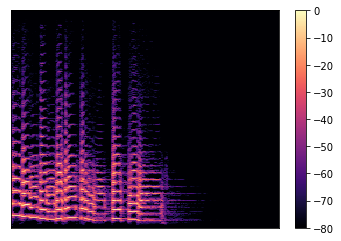

In [ ]:
import librosa.display
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

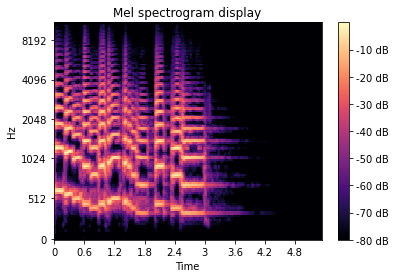

In [ ]:
#Cepstrum visualization
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

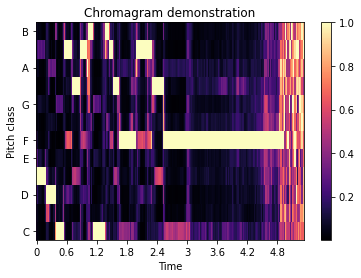

In [ ]:
#Chroma visualization
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

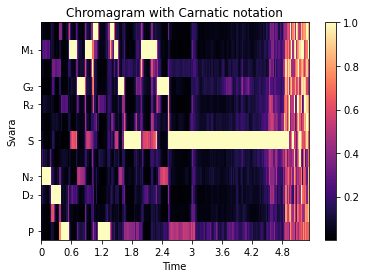

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma_c', x_axis='time',
                               Sa=5, mela=22, ax=ax)
ax.set(title='Chromagram with Carnatic notation')
fig.colorbar(img, ax=ax)

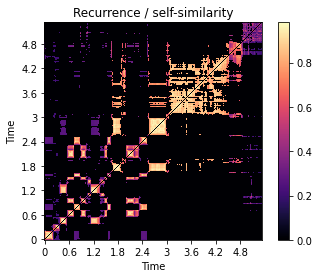

In [ ]:
#Non spectral data
R = librosa.segment.recurrence_matrix(chroma, mode='affinity')
fig, ax = plt.subplots()
img = librosa.display.specshow(R, y_axis='time', x_axis='time', ax=ax)
ax.set(title='Recurrence / self-similarity')
fig.colorbar(img, ax=ax)

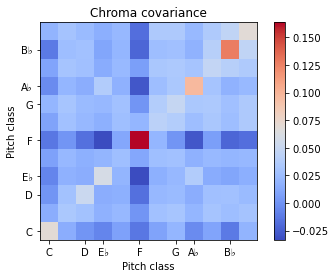

In [ ]:
#Chroma co-variance
ccov = np.cov(chroma)
fig, ax = plt.subplots()
img = librosa.display.specshow(ccov, y_axis='chroma', x_axis='chroma',
                               key='Eb:maj', ax=ax)
ax.set(title='Chroma covariance')
fig.colorbar(img, ax=ax)

Text(0.5, 1.0, 'time signal')

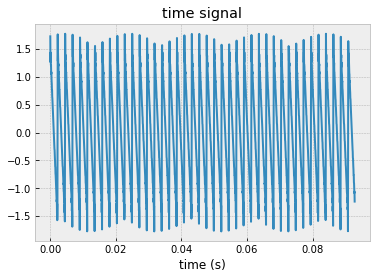

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

import numpy as np

def make_sine_wave(f0, sampling_frequency, frame_size, phase=0):
    """Generates a sine wave of frequency f0.

    :param f0: float, fundamental frequency
    :param sampling_frequency: int, number of samples per second
    :param frame_size: int, number of samples in frame
    :return:
        - waveform - ndarray of waveform
    """
    t = np.arange(frame_size) / sampling_frequency
    return np.sin(2 * np.pi * f0 * t + phase)


def make_harmonic_wave(f0, sampling_frequency, frame_size, n_harmonics=10):
    """Generates a 1/f weighted harmonic (multiples of f0) wave of frequency f0.

    :param f0: float, fundamental frequency
    :param sampling_frequency: int, number of samples per second
    :param frame_size: int, number of samples in frame
    :param n_harmonics: int, number of harmonics to add
    :return:
        - waveform - ndarray of waveform
    """
    waveform = np.zeros((frame_size,), dtype=float)
    for f in [f0 * i for i in range(1, n_harmonics + 1)]:
        waveform += f0 / f * make_sine_wave(f, sampling_frequency, frame_size, phase=f)
    return waveform

sample_freq = 22050 # Hz
frame_size = 2048
time_vector = np.arange(frame_size) / sample_freq
signal = make_harmonic_wave(440, sample_freq, frame_size, n_harmonics=20)

fig, ax = plt.subplots()
ax.plot(time_vector, signal)
ax.set_xlabel('time (s)')
ax.set_title('time signal')

Text(0.5, 1.0, 'Fourier spectrum')

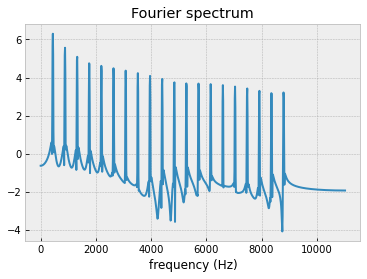

In [ ]:
windowed_signal = np.hamming(frame_size) * signal
dt = 1/sample_freq
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
X = np.fft.rfft(windowed_signal)
log_X = np.log(np.abs(X))

fig, ax = plt.subplots()
ax.plot(freq_vector, log_X)
ax.set_xlabel('frequency (Hz)')
ax.set_title('Fourier spectrum')

Text(0.5, 1.0, 'cepstrum')

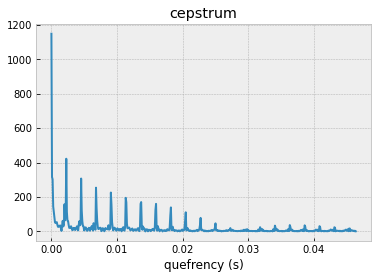

In [ ]:
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)

fig, ax = plt.subplots()
ax.plot(quefrency_vector, np.abs(cepstrum))
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')

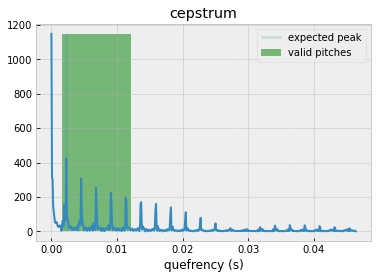

In [ ]:
import matplotlib.collections as collections

fig, ax = plt.subplots()
ax.vlines(1/440, 0, np.max(np.abs(cepstrum)), alpha=.2, lw=3, label='expected peak')
ax.plot(quefrency_vector, np.abs(cepstrum))
valid = (quefrency_vector > 1/640) & (quefrency_vector <= 1/82)
collection = collections.BrokenBarHCollection.span_where(
    quefrency_vector, ymin=0, ymax=np.abs(cepstrum).max(), where=valid, facecolor='green', alpha=0.5, label='valid pitches')
ax.add_collection(collection)
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')
ax.legend()